<a id='section_id2'></a>
# Exploratory Data Analysis (EDA)

### Background of Dataset
This dataset is obtained from [Kaggle](https://www.kaggle.com/shivamb/netflix-shows) and consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from [Flixable](https://flixable.com) which is a third-party Netflix search engine.

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import datetime as dt
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
py.init_notebook_mode(connected = True) 

%matplotlib inline  

from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

Error importing optional module geopandas
Traceback (most recent call last):
  File "/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/_plotly_utils/optional_imports.py", line 28, in get_module
    return import_module(name)
  File "/Users/samuel/opt/anaconda3/lib/python3.7/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 967, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/geopandas/__init__.py", line 1, in <module>
    from geopandas.geoseries import GeoSeries  # noqa
  File "/U

To display all the information from the columns and rows.

In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### Load Dataset

In [3]:
df = pd.read_csv('./netflix_titles.csv')
df.head()

show_id     type                                    title  \
0  81145628  Movie    Norm of the North: King Sized Adventure   
1  80117401  Movie    Jandino: Whatever it Takes                
2  70234439  TV Show  Transformers Prime                        
3  80058654  TV Show  Transformers: Robots in Disguise          
4  80125979  Movie    #realityhigh                              

                   director  \
0  Richard Finn, Tim Maltby   
1  NaN                        
2  NaN                        
3  NaN                        
4  Fernando Lebrija           

                                                                                                                                                                                 cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole Howard, Jennifer Cameron, Jonathan Holmes, Lee Tockar, Lisa Durupt, Maya Kay, Michael Dobson                                          
1  Jandino Asporaat                                                                                                                                                                     
2  Peter Cullen, Sumalee Montano, Frank Welker, Jeffrey Combs, Kevin Michael Richardson, Tania Gunadi, Josh Keaton, Steve Blum, Andy Pessoa, Ernie Hudson, Daran Norris, Will Friedle   
3  Will Friedle, Darren Criss, Constance Zimmer, Khary Payton, Mitchell Whitfield, Stuart Allan, Ted McGinley, Peter Cullen                                                             
4  Nesta Cooper, Kate Walsh, John Michael Higgins, Keith Powers, Alicia Sanz, Jake Borelli, Kid Ink, Yousef Erakat, Rebekah Graf, Anne Winters, Peter Gilroy, Patrick Davis             

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019  2019           
1  United Kingdom                            September 9, 2016  2016           
2  United States                             September 8, 2018  2013           
3  United States                             September 8, 2018  2016           
4  United States                             September 8, 2017  2017           

     rating  duration                           listed_in  \
0  TV-PG     90 min    Children & Family Movies, Comedies   
1  TV-MA     94 min    Stand-Up Comedy                      
2  TV-Y7-FV  1 Season  Kids' TV                             
3  TV-Y7     1 Season  Kids' TV                             
4  TV-14     99 min    Comedies                             

                                                                                                                                            description  
0  Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first.          
1  Jandino Asporaat riffs on the challenges of raising kids and serenades the audience with a rousing rendition of "Sex on Fire" in his comedy show.     
2  With the help of three human allies, the Autobots once again protect Earth from the onslaught of the Decepticons and their leader, Megatron.          
3  When a prison ship crash unleashes hundreds of Decepticons on Earth, Bumblebee leads a new Autobot force to protect humankind.                        
4  When nerdy high schooler Dani finally attracts the interest of her longtime crush, she lands in the cross hairs of his ex, a social media celebrity.

Convert the _date, year, month_ to datetime format <br> Split the _duration_ column to separate columns for _season count_ and _duration_

In [4]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

Split the dataset based on TV Show/ Movie

In [5]:
df_tvshow = df[df['type'] == 'TV Show']
df_movies = df[df['type'] == 'Movie']

## Content Types

In [6]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="Netflix Content Type - Movies vs TV Shows", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/requests/__init__.py:80: RequestsDependencyWarning:

urllib3 (1.24.3) or chardet (3.0.4) doesn't match a supported version!



The content type within the dataset comprises of 68.4% of Movies and 31.6% of TV Shows.

## Content Ratings

In [7]:
movie = df[df['type'] == 'Movie']    
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
movie_rating = movie['rating'].value_counts()[rating_order]  

In [8]:
tv_show = df[df['type'] == 'TV Show']   
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
tv_rating = tv_show['rating'].value_counts()[rating_order] 

/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1152: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike



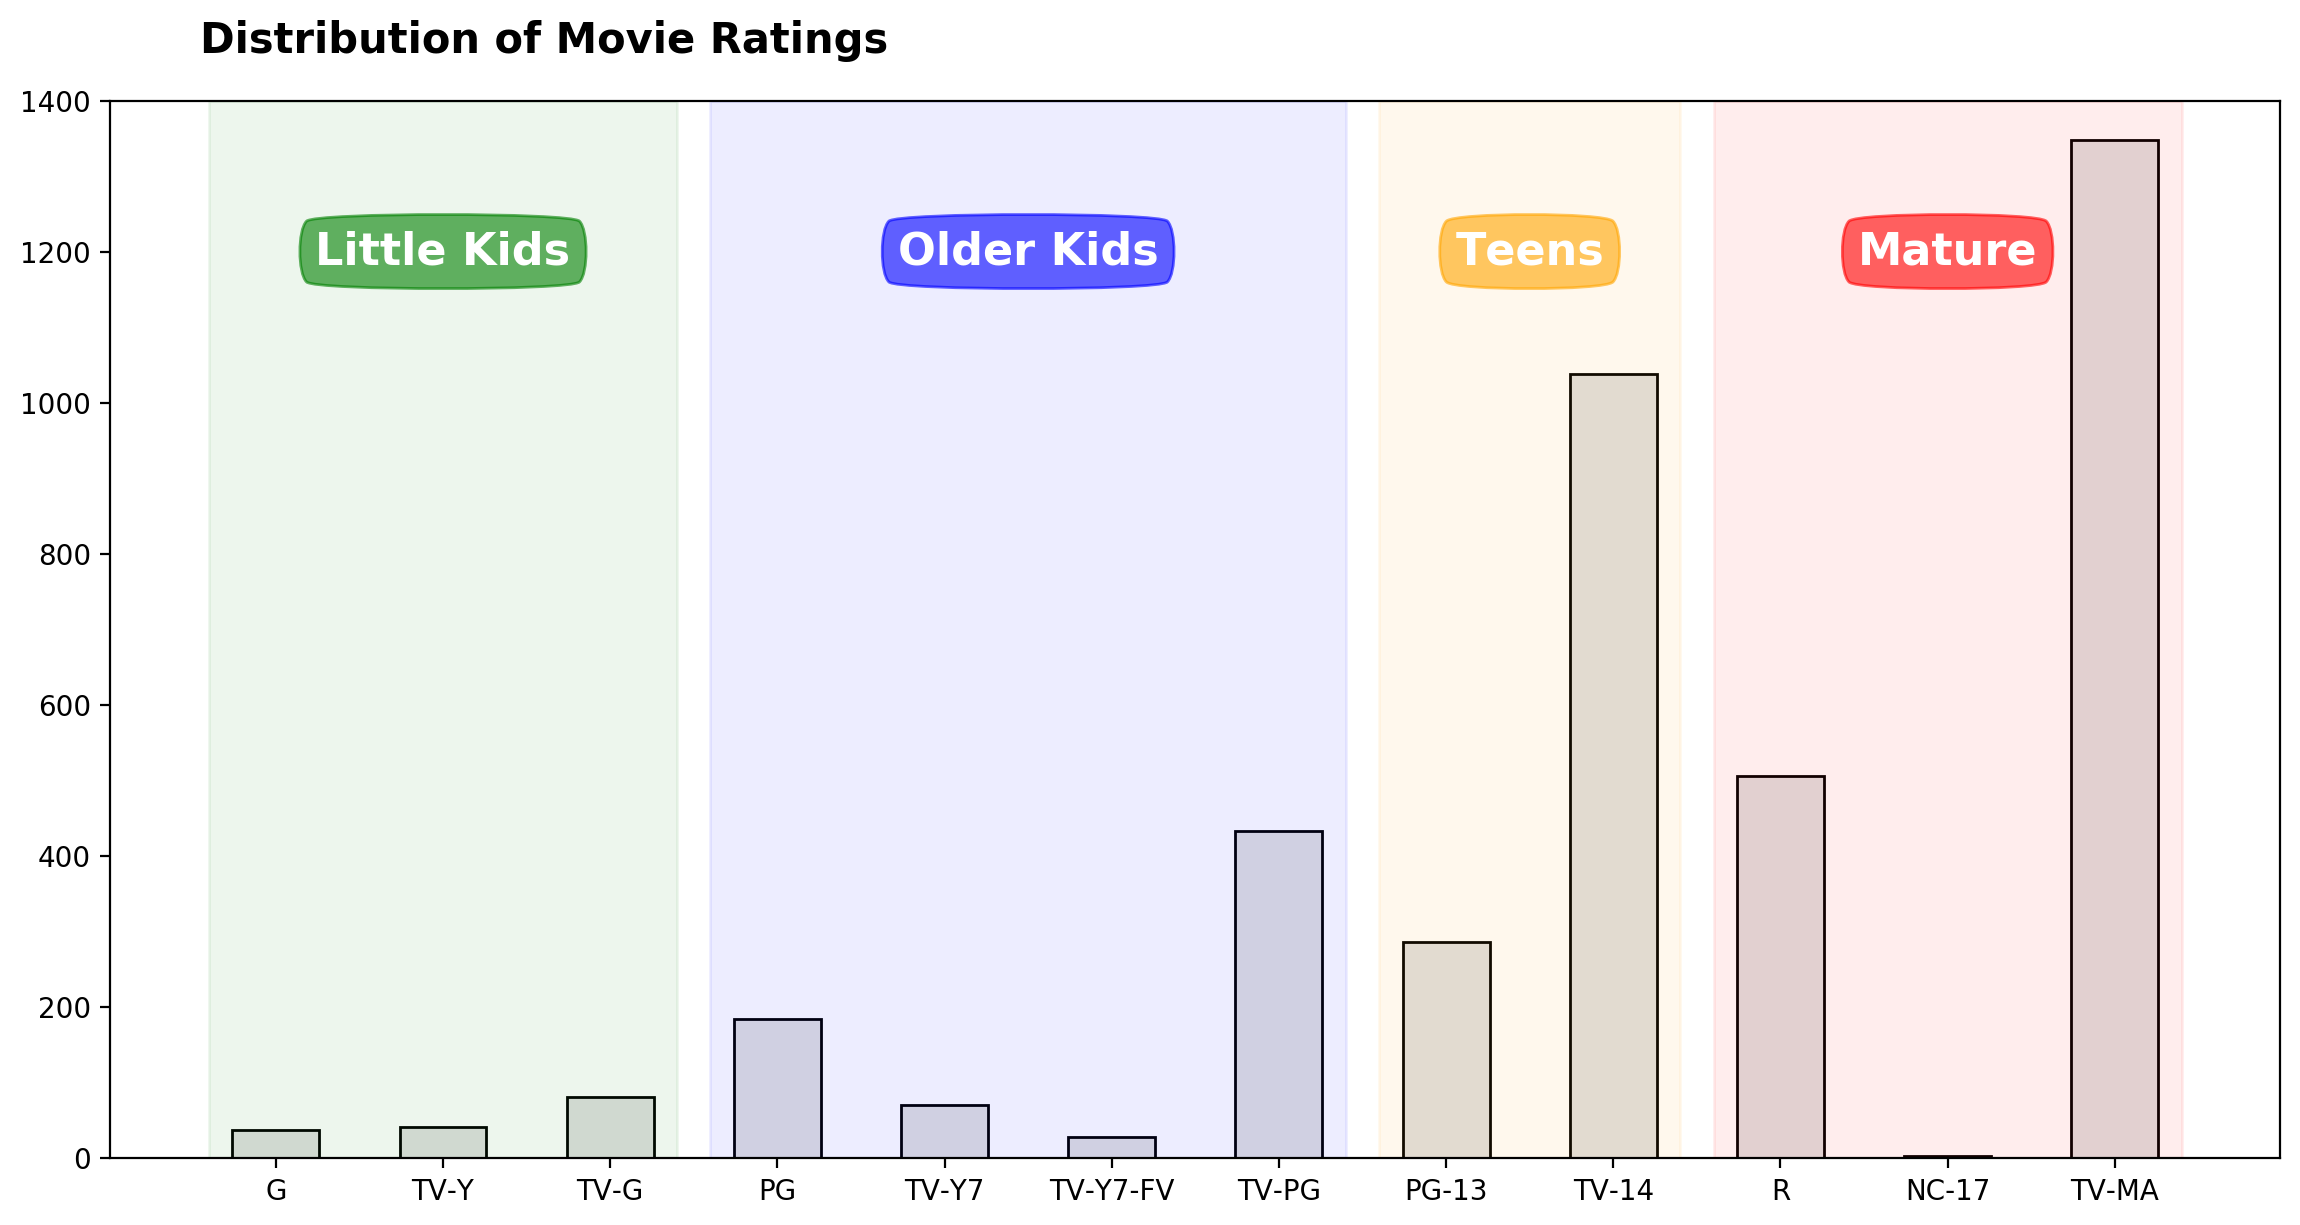

In [9]:
#Function for Barplot of Distribution of Ratings
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(14, 7), dpi=200)
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#e0e0e0", width=0.52, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
    ax.set_title(f'Distribution of {title} Ratings', fontsize=15, fontweight='bold', position=(0.20, 1.0+0.03))
    plt.show()
    
rating_barplot(movie_rating,'Movie', 1200, 1400)

Based on the distribution above, most of the movie ratings within the dataset cater towards Teens and Mature Audiences as compared to Little Kids and Older Kids.

In [10]:
rating_barplot(tv_rating,'TV Show', 1200, 1400)

Similar to the movie ratings, most of the TV Show ratings within the dataset cater towards Teens and Mature Audiences as compared to Little Kids and Older Kids.

**USA TV Ratings**
- TV-Y – This program is aimed at a very young audience, including children from ages 2–6.
- TV-Y7 – This program is designed for children age 7 and above.
- TV-Y7-FV - Some programs may be given the "FV" content descriptor if they exhibit more 'fantasy violence', and/or are generally more intense or combative than other programs rated TV-Y7.
- TV-G – Most parents would find this program suitable for all ages. Programs rated TV-G are generally suitable for all ages. The FCC states that "this rating does not signify a program designed specifically for children, most parents may let younger children watch this program unattended." The thematic elements portrayed in programs with this rating contain little or no violence, no strong language, and little or no sexual dialogue or situations.
- TV-PG – Parental guidance is recommended; these programs may be unsuitable for younger children.
- TV-14 – This program contains some material that many parents would find unsuitable for children under 14 years of age.
- TV-MA – This program is intended to be viewed by adults and therefore may be unsuitable for children under 17.

**USA Movie Ratings**
- G – _General Audiences_ - All ages admitted. Nothing that would offend parents for viewing by children.
- PG – _Parental Guidance Suggested_ - Some material may not be suitable for children. Parents urged to give "parental guidance". May contain some material parents might not like for their young children.
- PG-13 – _Parents Strongly Cautioned_ - Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers.
- R – _Restricted_ - Under 17 requires accompanying parent or adult guardian. Contains some adult material. Parents are urged to learn more about the film before taking their young children with them.
- NC-17 – _Adults Only_ - No One 17 and Under Admitted. Clearly adult. Children are not admitted.

## Countries with the Most Content

In [11]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

country_vals = geoplot(df)
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Countries with most content", height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

Countries with the most content produced are United States, India, United Kingdom, Canada, France, Japan and Spain. This is not a surprise considering that it covers the majority of the big regions and markets for Netflix customers.

## Month in which Content was Added

In [12]:
d1 = df[(df["type"] == "TV Show") & (df["year_added"] < 2020)]
d2 = df[(df["type"] == "Movie") & (df["year_added"] < 2020)]

col = 'month_added'
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
data = [trace1]
layout = go.Layout(title="In which month, was content added the most?", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

Netflix added most of its content in December, followed by October, with the least being in January and February. This is hardly surprising as Netflix tries to release content that coincides with the major peak/ holiday periods where people are more inclined to subscribe/ watch Netflix.

## Content Added Over the Years

In [13]:
col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added by year", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

There is an exponentially increasing trend of TV Shows and Movies being added into Netflix from 2014 onwards and it seems to be trending upwards in the foreseeable future.

In [14]:
col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added by release date", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

Similarly when looking at release date, Netflix is adding newer movies and TV Shows at an increasingly higher rate in recent years.

## Content Added by Genre

In [15]:
col = "listed_in"
categories = ", ".join(d1['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Content added by Genre - TV Shows", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

For TV Shows, the genre that is being added the most is International TV Shows, followed by TV Dramas, TV Comedies, Crime TV Shows and Kids' TV.

In [16]:
col = "listed_in"
categories = ", ".join(d2['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="Movies", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Content added by Genre - Movies", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

For Movies, the genre that is being added the most is International Movies, followed by Dramas, Comedies, Documentaries and Action & Adventure.

## Season Count

**GREY'S ANATOMY AND NCIS HAVE HIGHEST NO. OF SEASON ON NETFLIX**

title director  \
5908  Grey's Anatomy  NaN       
5974  NCIS            NaN       

                                                                                                                                                                                                                                 cast  \
5908  Ellen Pompeo, Sandra Oh, Katherine Heigl, Justin Chambers, Patrick Dempsey, Chandra Wilson, T.R. Knight, James Pickens Jr., Isaiah Washington, Sara Ramirez, Eric Dane, Chyler Leigh, Kate Walsh, Kevin McKidd, Jessica Capshaw   
5974  Mark Harmon, Michael Weatherly, Pauley Perrette, David McCallum, Sean Murray, Cote de Pablo, Brian Dietzen, Rocky Carroll, Lauren Holly, Sasha Alexander, Joe Spano, Alan Dale, Emily Wickersham, Pancho Demmings                 

            country  release_year  
5908  United States  2018          
5974  United States  2017

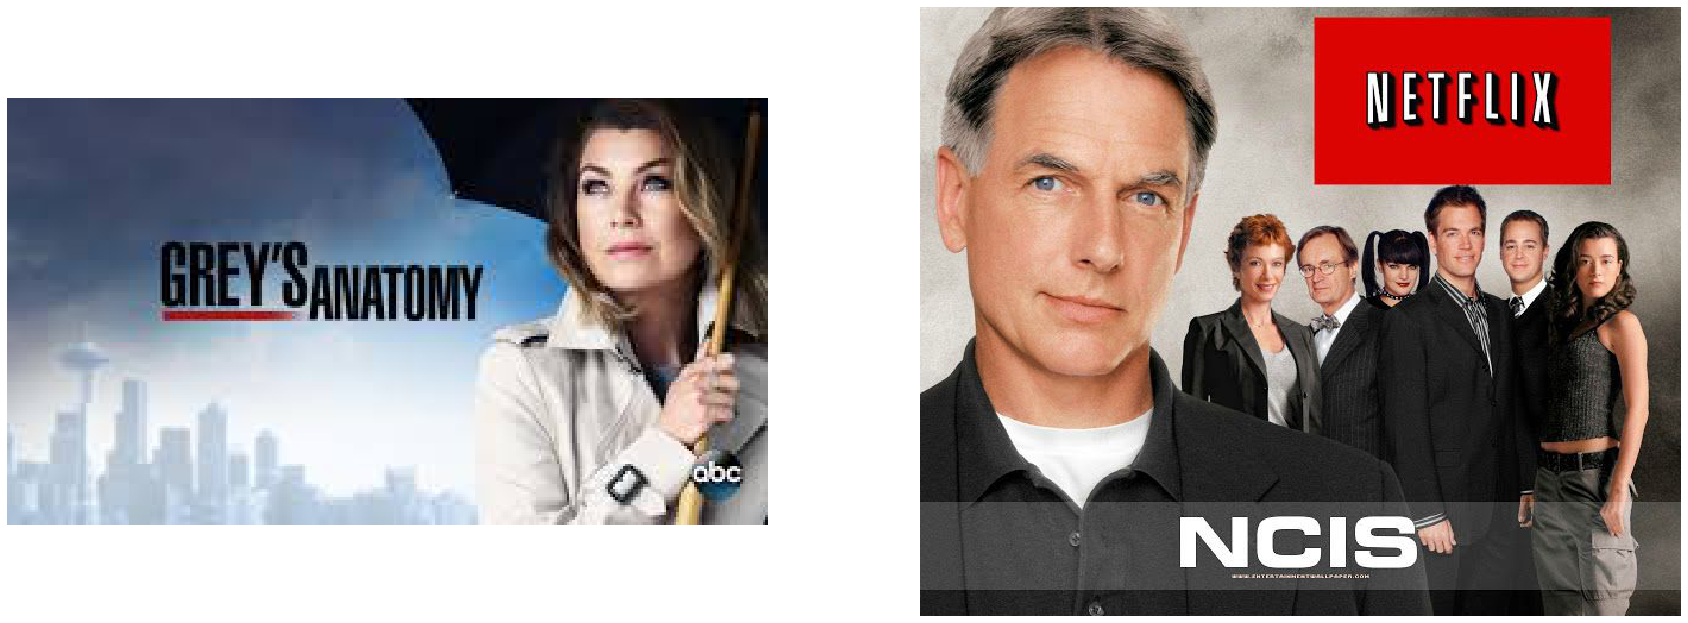

In [17]:
bold("**GREY'S ANATOMY AND NCIS HAVE HIGHEST NO. OF SEASON ON NETFLIX**")
display(df[df['season_count'] == '15'][['title','director', 'cast','country','release_year']])

# image
import urllib.request
from PIL import Image

plt.subplots(figsize=(30,60))
plt.subplot(121)
image = Image.open(urllib.request.urlopen(url='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ0A6upRBYwNBw68tempa18gIxAliLNWkv60-X-fbgQ6rgQOGwC&s'))
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
image = Image.open(urllib.request.urlopen(url='https://i.pinimg.com/originals/58/dc/ba/58dcba558659a13a843c489fa29146f2.jpg'))
plt.imshow(image)
plt.axis('off')
plt.show()

# plot
trace = go.Histogram(
                     x = df['season_count'],
                     marker = dict(color = 'rgb(249, 6, 6)'))
layout = go.Layout(template= "plotly_dark", title = 'Seasons of TV Shows', xaxis = dict(title = 'No. of Seasons'))
fig = go.Figure(data = [trace], layout = layout)
fig.show()

## Oldest Movies/TV Shows on Netflix

**OLDEST MOVIES ON NETFLIX**

title  release_year  \
2011  Prelude to War                                    1942           
2013  The Battle of Midway                              1942           
2022  Undercover: How to Operate Behind Enemy Lines     1943           
2023  Why We Fight: The Battle of Russia                1943           
2026  WWII: Report from the Aleutians                   1943           
2017  The Memphis Belle: A Story of a\nFlying Fortress  1944           
2019  The Negro Soldier                                 1944           
2021  Tunisian Victory                                  1944           
2012  San Pietro                                        1945           
2009  Nazi Concentration Camps                          1945           

                          listed_in                        country  
2011  Classic Movies, Documentaries  United States                  
2013  Classic Movies, Documentaries  United States                  
2022  Classic Movies, Documentaries  United States                  
2023  Documentaries                  United States                  
2026  Documentaries                  United States                  
2017  Classic Movies, Documentaries  United States                  
2019  Classic Movies, Documentaries  United States                  
2021  Classic Movies, Documentaries  United States, United Kingdom  
2012  Classic Movies, Documentaries  United States                  
2009  Classic Movies, Documentaries  United States

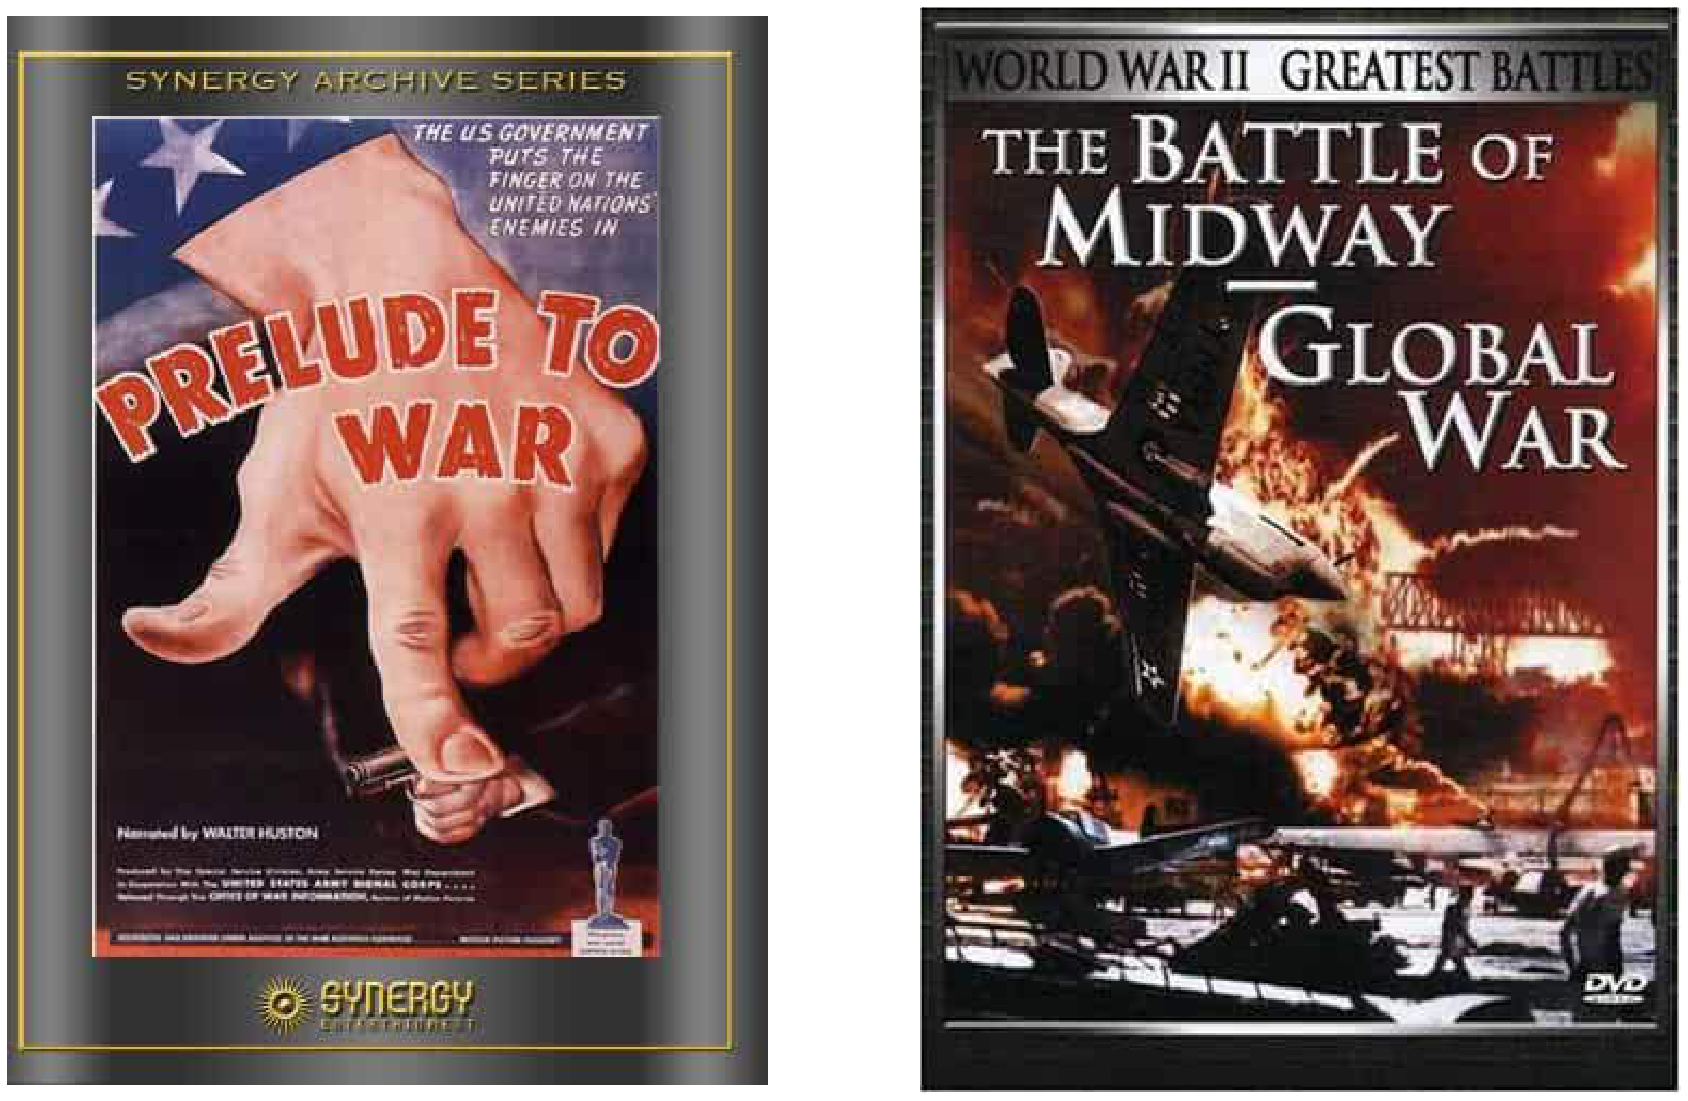

In [18]:
bold('**OLDEST MOVIES ON NETFLIX**')
oldest = df.sort_values("release_year", ascending = True)
oldest = oldest[oldest['duration'] != ""]
display(oldest[['title', "release_year", 'listed_in','country']][:10])

plt.subplots(figsize=(30,60))
plt.subplot(121)
image = Image.open(urllib.request.urlopen(url='https://m.media-amazon.com/images/M/MV5BMTY3NTMyMDQ4NF5BMl5BanBnXkFtZTgwMjkzODgwMzE@._V1_QL50_.jpg'))
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
image = Image.open(urllib.request.urlopen(url='https://m.media-amazon.com/images/M/MV5BMTY3Njg3MDUxMl5BMl5BanBnXkFtZTcwMzE4MTU1MQ@@._V1_QL50_.jpg'))
plt.imshow(image)
plt.axis('off')
plt.show()

**OLDEST TV SHOW ON NETFLIX**

title  release_year  \
4292  Pioneers: First Women Filmmakers*    1925           
4079  Pioneers of African-American Cinema  1946           
5981  The Twilight Zone (Original Series)  1963           
5980  The Andy Griffith Show               1967           
5704  Star Trek                            1968           
614   Monty Python's Fliegender Zirkus     1972           
5669  Monty Python's Flying Circus         1974           
5830  Dad's Army                           1977           
4273  El Chavo                             1979           
4369  Ninja Hattori                        1981           

                                                          listed_in  \
4292  TV Shows                                                        
4079  TV Shows                                                        
5981  Classic & Cult TV, TV Sci-Fi & Fantasy                          
5980  Classic & Cult TV, TV Comedies                                  
5704  Classic & Cult TV, TV Action & Adventure, TV Sci-Fi & Fantasy   
614   International TV Shows, TV Comedies                             
5669  British TV Shows, Classic & Cult TV, International TV Shows     
5830  British TV Shows, Classic & Cult TV, TV Comedies                
4273  Classic & Cult TV, Kids' TV, Spanish-Language TV Shows          
4369  Anime Series, Kids' TV                                          

                           country  
4292  NaN                           
4079  United States                 
5981  United States                 
5980  United States                 
5704  United States                 
614   United Kingdom, West Germany  
5669  United Kingdom                
5830  United Kingdom                
4273  Mexico                        
4369  Japan

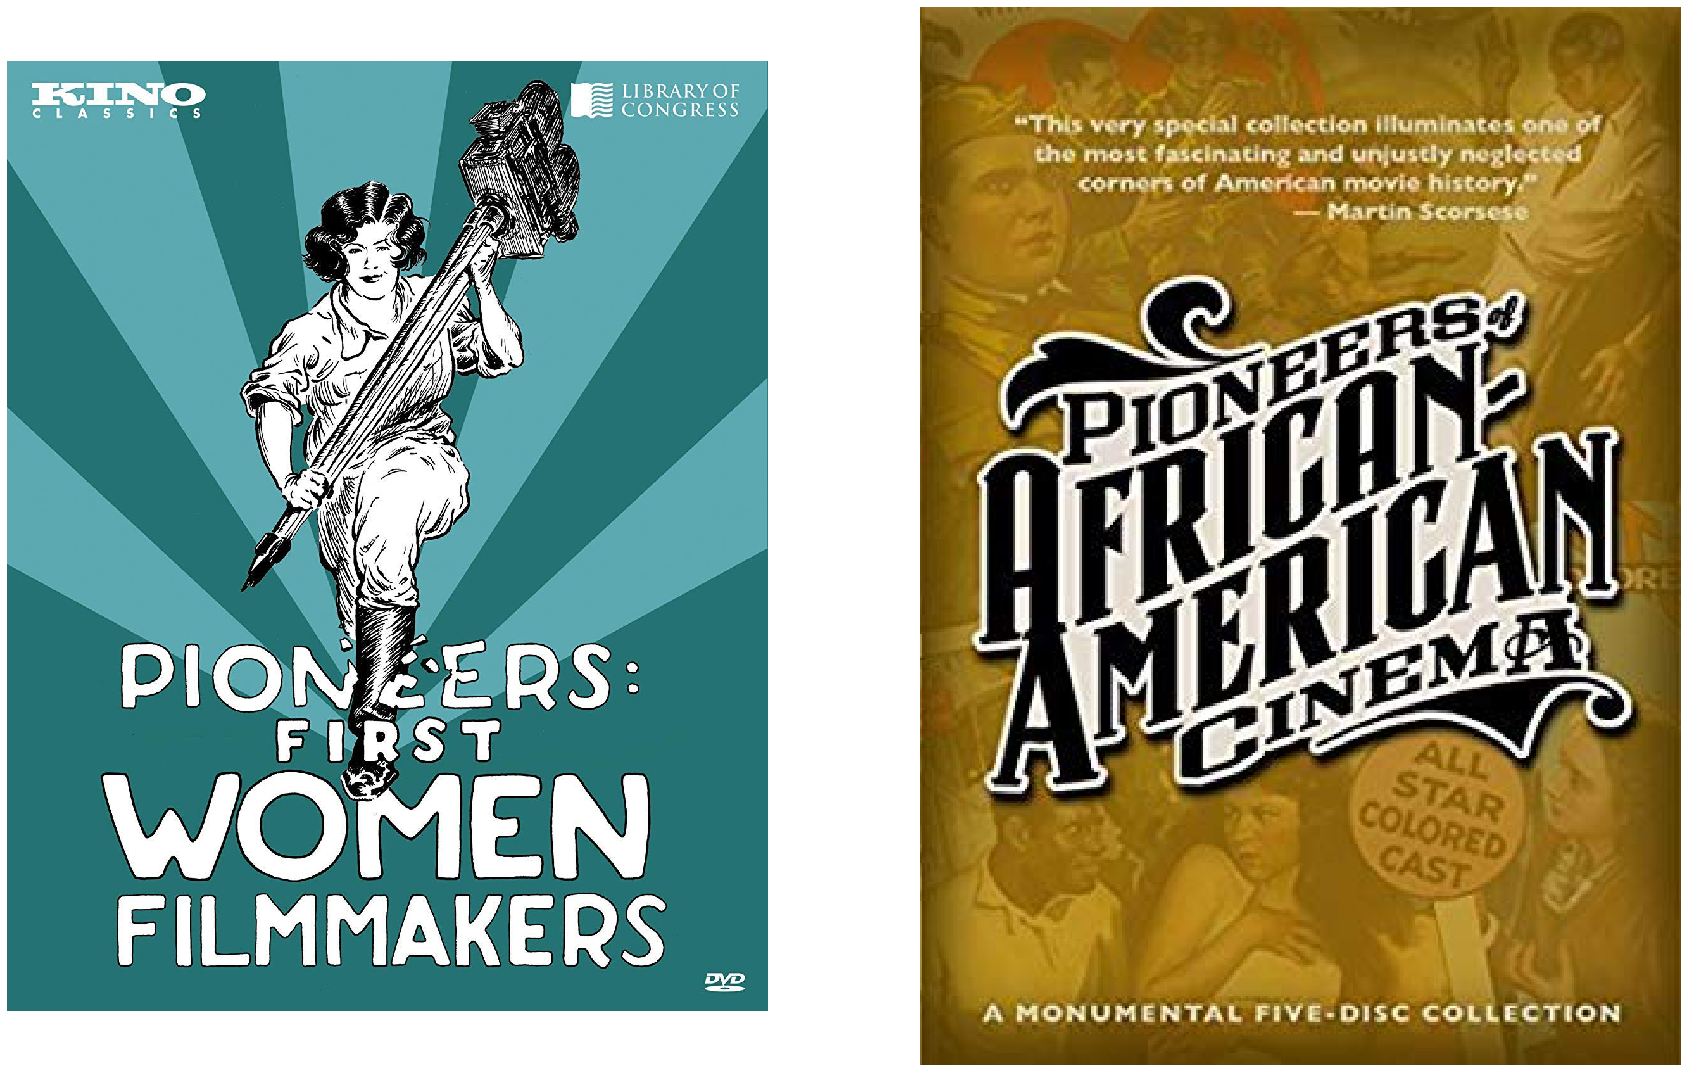

In [19]:
bold('**OLDEST TV SHOW ON NETFLIX**')
oldest = df.sort_values("release_year", ascending = True)
oldest = oldest[oldest['season_count'] != ""]
display(oldest[['title', "release_year", 'listed_in','country']][:10])

plt.subplots(figsize=(30,60))
plt.subplot(121)
image = Image.open(urllib.request.urlopen(url='https://images-na.ssl-images-amazon.com/images/I/71ddmI5x94L._SL1500_.jpg'))
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
image = Image.open(urllib.request.urlopen(url='https://images-na.ssl-images-amazon.com/images/I/51KqZA%2B42OL._SY445_.jpg'))
plt.imshow(image)
plt.axis('off')
plt.show()

## Movie Duration

In [20]:
x1 = d2['duration'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], ['Movie Duration'], bin_size=0.7, curve_type='normal', colors=['#6ad49b'])
fig.update_layout(title_text='Distribution of Movies Duration', height=750)
fig.show()

The average Movie Duration in Netflix is approximately 97 to 98 mins, and the distribution of Movie Duration generally follows a normal distribution curve.

## Most Popular Actors by Country

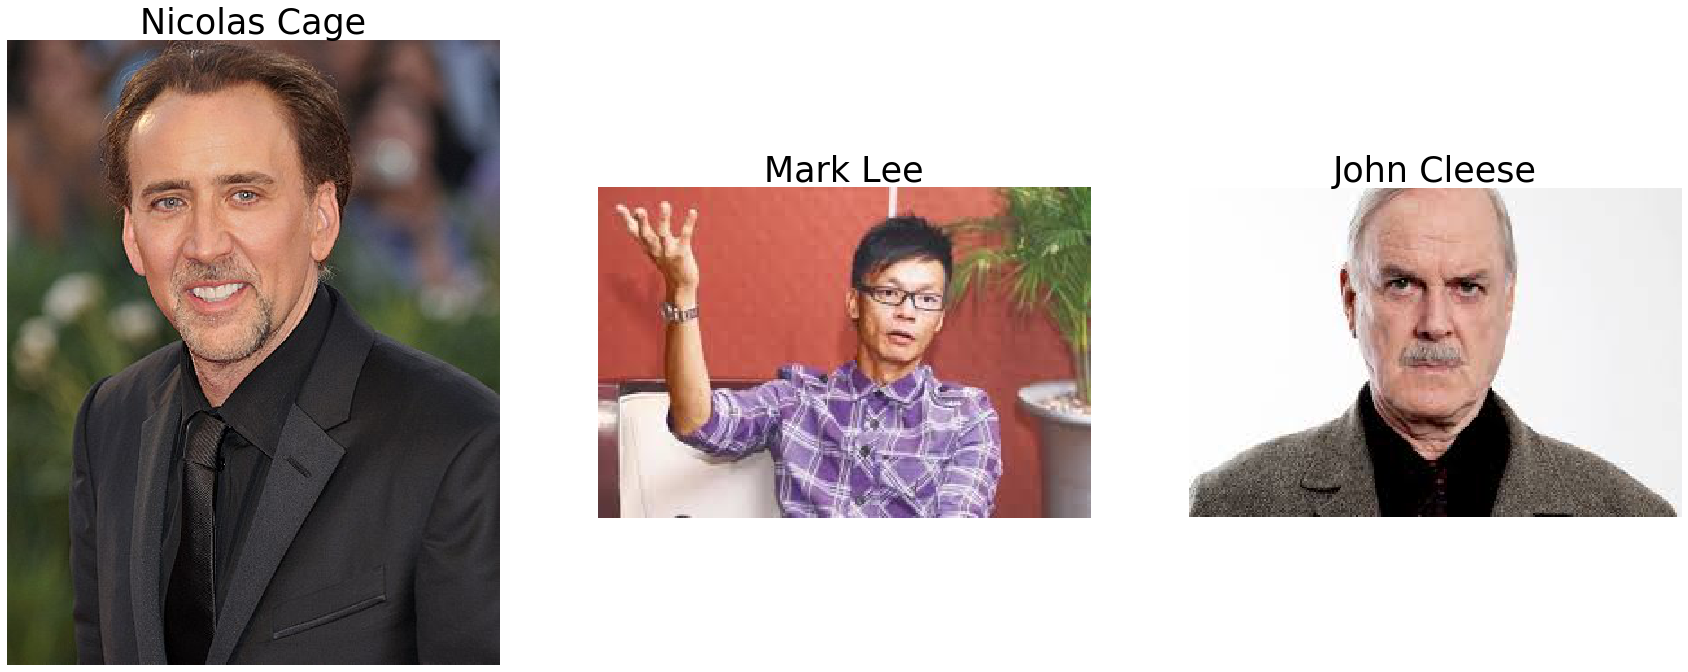

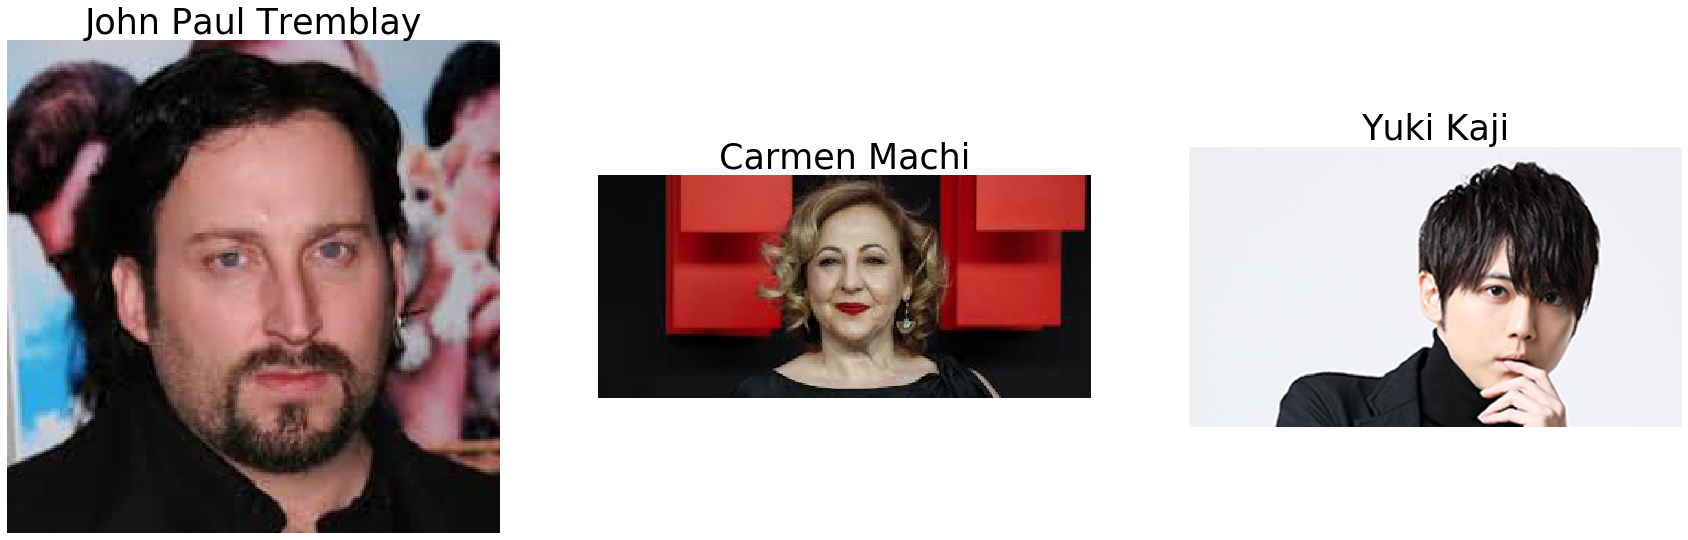

In [21]:
def country_trace(country, flag = "movie"):
    df["from_us"] = df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
    return trace

traces = []
titles = ["United States", "","Singapore","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

plt.subplots(figsize=(30,60))
plt.subplot(131)
image = Image.open('images/nicolascage.jpg')
plt.title('Nicolas Cage', fontsize=35)
plt.imshow(image)
plt.axis('off')

plt.subplot(132)
image = Image.open('images/marklee')
plt.title('Mark Lee', fontsize=35)
plt.imshow(image)
plt.axis('off')

plt.subplot(133)
image = Image.open('images/johncleese')
plt.title('John Cleese', fontsize=35)
plt.imshow(image)
plt.axis('off')

plt.subplots(figsize=(30,60))
plt.subplot(131)
image = Image.open('images/johnpaultremblay.jpeg')
plt.title('John Paul Tremblay', fontsize=35)
plt.imshow(image)
plt.axis('off')

plt.subplot(132)
image = Image.open('images/carmenmachi.jpeg')
plt.title('Carmen Machi', fontsize=35)
plt.imshow(image)
plt.axis('off')

plt.subplot(133)
image = Image.open('images/yukikaji.jpg')
plt.title('Yuki Kaji', fontsize=35)
plt.imshow(image)
plt.axis('off')
plt.show()

fig.update_layout(height=1200, showlegend=False)
fig.show()

In [30]:
traces = []
titles = ["United States","", "United Kingdom"]
for title in titles:
    if title != "":
        traces.append(country_trace(title, flag="tv_shows"))

fig = make_subplots(rows=1, cols=3, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)

plt.subplots(figsize=(30,60))
plt.subplot(121)
image = Image.open('images/ashleighball.jpg')
plt.title('Ashleigh Ball', fontsize=35)
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
image = Image.open('images/davidattenborough.jpg')
plt.title('David Attenborough', fontsize=35)
plt.imshow(image)
plt.axis('off')
plt.show()

fig.update_layout(height=600, showlegend=False)
fig.show()

## Most Popular Directors by Country

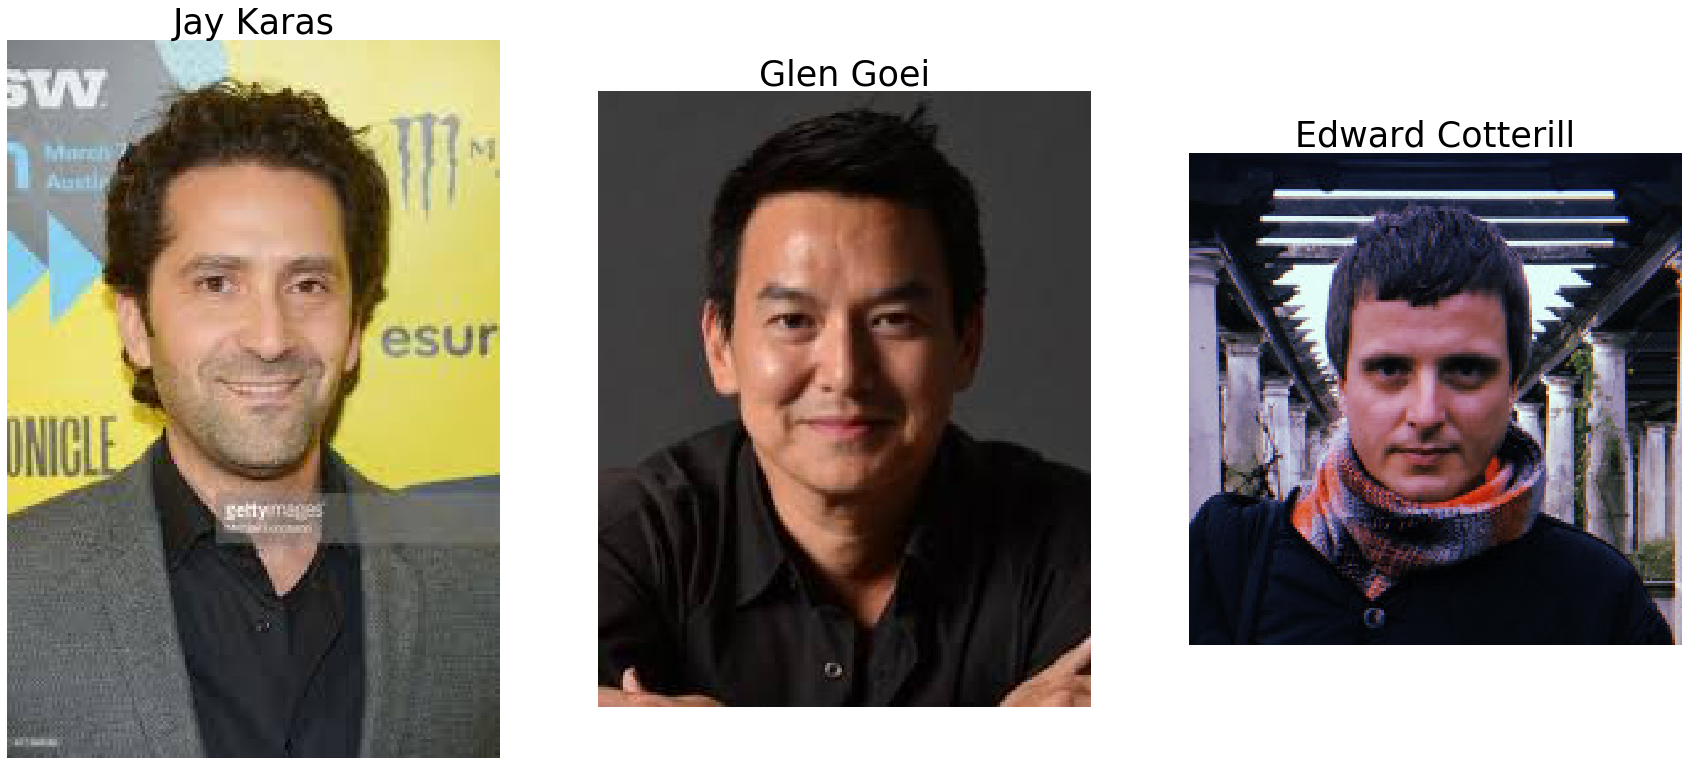

In [23]:
def country_trace1(country, flag = "movie"):
    df["from_us"] = df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    director = ", ".join(small['director'].fillna("")).split(", ")
    tags = Counter(director).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
    return trace

traces = []
titles = ["United States", "","Singapore","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_trace1(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

plt.subplots(figsize=(30,60))
plt.subplot(131)
image = Image.open('images/jaykaras')
plt.title('Jay Karas', fontsize=35)
plt.imshow(image)
plt.axis('off')

plt.subplot(132)
image = Image.open('images/glengoei')
plt.title('Glen Goei', fontsize=35)
plt.imshow(image)
plt.axis('off')

plt.subplot(133)
image = Image.open('images/edwardcotterill.jpeg')
plt.title('Edward Cotterill', fontsize=35)
plt.imshow(image)
plt.axis('off')

plt.subplots(figsize=(30,60))
plt.subplot(131)
image = Image.open('images/justingdyck')
plt.title('Justin G. Dyck', fontsize=35)
plt.imshow(image)
plt.axis('off')

plt.subplot(132)
image = Image.open('images/hernanzin')
plt.title('Hernan Zin', fontsize=35)
plt.imshow(image)
plt.axis('off')

plt.subplot(133)
image = Image.open('images/toshiyashinohara')
plt.title('Toshiya Shinohara', fontsize=35)
plt.imshow(image)
plt.axis('off')
plt.show()

fig.update_layout(height=1200, showlegend=False)
fig.show()

In [29]:
traces = []
titles = ["United States","", "United Kingdom"]
for title in titles:
    if title != "":
        traces.append(country_trace1(title, flag="tv_shows"))

fig = make_subplots(rows=1, cols=3, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)

plt.subplots(figsize=(30,60))
plt.subplot(121)
image = Image.open('images/kenburns')
plt.title('Ken Burns', fontsize=35)
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
image = Image.open('images/alastairfothergill.jpg')
plt.title('Alastair Fothergill', fontsize=35)
plt.imshow(image)
plt.axis('off')
plt.show()

fig.update_layout(height=600, showlegend=False)
fig.show()

## Word Clouds

Based on the word clouds, some of the popular movie/TV show titles appear to contain the words - _Love, Man, World, Christmas, Girl_. This is not terribly surprising as most of the popular movies seem to revolve around the themes of romance and holiday periods. Splitting the dataset based on movies and TV shows also yielded similar results.

In [25]:
# Wordcloud for Most Popular Words in Movie/TV Show Titles
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS, width = 900,  height = 750, max_words = 123).generate(' '.join(df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Movie/TV Show Titles',fontsize = 30)
plt.show()

In [26]:
# Wordcloud for Most Popular Words in Movie Titles
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS, width = 900,  height = 750, max_words = 123).generate(' '.join(df_movies['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Movie Titles',fontsize = 30)
plt.show()

In [27]:
# Wordcloud for Most Popular Words in TV Show Titles
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS, width = 900,  height = 750, max_words = 123).generate(' '.join(df_tvshow['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in TV Show Titles',fontsize = 30)
plt.show()